In [1]:
import numpy as np
import matplotlib.pyplot as plt

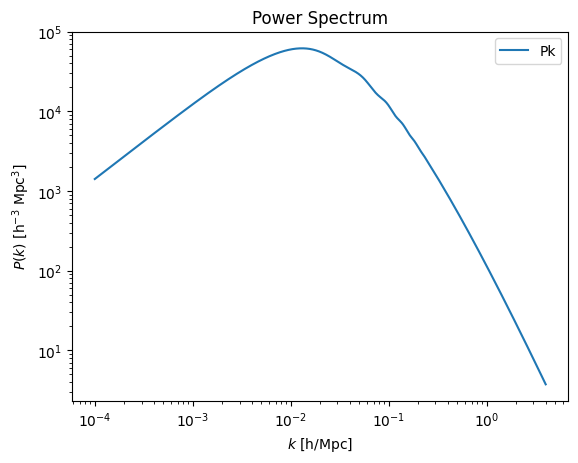

In [2]:
data = np.loadtxt("k_array_Pk.txt", skiprows=1)

# Sépare les colonnes
k = data[:, 0]  # 1ère colonne
Pk = data[:, 1]  # 2ème colonne

plt.plot(k, Pk, label='Pk')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k$ [h/Mpc]')
plt.ylabel(r'$P(k)$ [h$^{-3}$ Mpc$^3$]')
plt.title('Power Spectrum')
plt.legend()
# plt.grid()
plt.show()

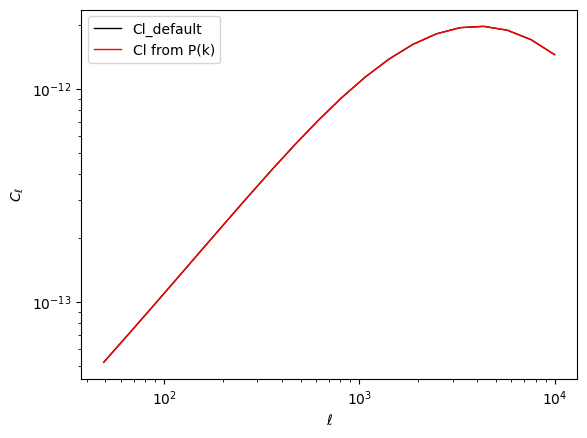

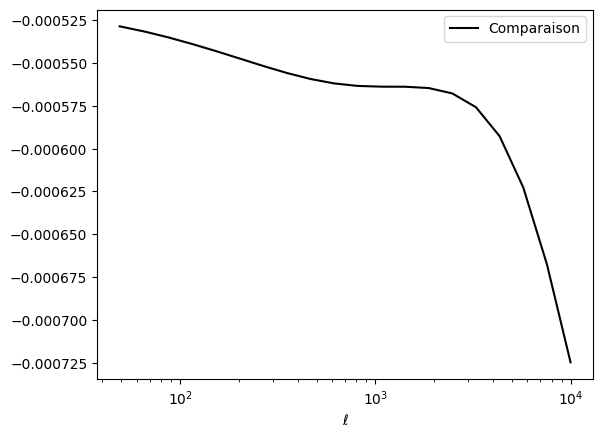

In [ ]:
default = np.loadtxt("C:/Users/thoma/Docs/Parcours_recherche/Code/Cobaya_data/Mock/mock_default.txt")
data = np.loadtxt("Cl_from_Pk.txt")


# Sépare les colonnes
ell_default = default[:, 0]  # 1ère colonne
Cl_default = default[:, 1]  # 2ème colonne
ell = data[:, 0]  # 1ère colonne
Cl = data[:, 1]  # 2ème colonne

plt.plot(ell_default, Cl_default, label='Cl_default', color = 'black')
plt.plot(ell, Cl, label='Cl from P(k)', color = 'red')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_{\ell}$')
plt.show()

plt.plot(ell, Cl/Cl_default - 1, label = "Comparaison", color = 'black')
plt.legend()
plt.xscale('log')
# plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.show()